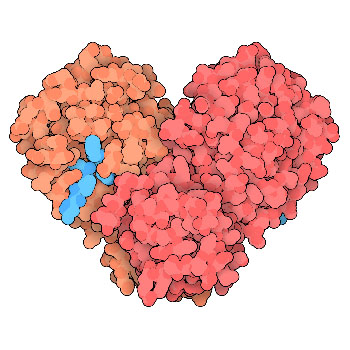

SARS-CoV-2 (2019-nCoV) coronavirus main protease, with inhibitor in turquoise.


# Hello

Notebook is based on this great video, just wrapped into colab:
https://www.youtube.com/watch?v=rBEKZQ22nhs

Suggest improvements @ https://github.com/vegetablejuiceftw/coronavirus-begone

- Because I have no experience in this field, so the results might just be wrong :P

# Dependencies 
## Install Autodock Vina and Openbabel

Openbabel translates .smi, .mol2, .pdb and what else into Vina approved .pdbqt  
(pyrx was too much of a hassle to install)

In [0]:
!sudo apt install autodock-vina openbabel pymol

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  apbs libglew2.0 libmaloc1 libopenbabel4v5 pymol-data python-opengl
  python-pmw
Suggested packages:
  autodock autogrid glew-utils libgle3 python-pmw-doc
The following NEW packages will be installed:
  apbs autodock-vina libglew2.0 libmaloc1 libopenbabel4v5 openbabel pymol
  pymol-data python-opengl python-pmw
0 upgraded, 10 newly installed, 0 to remove and 25 not upgraded.
Need to get 8,849 kB of archives.
After this operation, 38.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libmaloc1 amd64 0.2-3.1 [48.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 apbs amd64 1.4-1build1 [218 kB]
Get:3 http://archive.ubuntu.com/ubuntu bi

## Example usecase for babel

Source: https://www.researchgate.net/post/How_to_convert_a_smile_string_into_PDB_file

HIV inhibitor
https://zinc15.docking.org/substances/ZINC000085548251/

In [0]:
!echo 'CC(C)[C@H](NC(=O)N(C)Cc1ccccn1)C(=O)N[C@@H](Cc1ccccc1)[C@H](O)[C@H](O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)N(C)Cc1ccccn1)C(C)C NameOfMoleculeHere' > inhibitor.smi
!obabel *.smi -opdbqt -m --gen3d best -p 
!echo " - - - - - - - - - - - -" && head inhibitor.pdbqt

*** Open Babel Warning  in CheckForUnintendedBatch
  This was a batch operation. For splitting, use non-empty base name for the output files
1 molecule converted
 - - - - - - - - - - - -
REMARK  Name = NameOfMoleculeHere
REMARK                            x       y       z     vdW  Elec       q    Type
REMARK                         _______ _______ _______ _____ _____    ______ ____
ROOT
ATOM      1  C   LIG    1       10.059  -5.020  -6.018  0.00  0.00    +0.165 C 
ENDROOT
BRANCH   1   2
ATOM      2  O   LIG    1       11.411  -4.571  -6.081  0.00  0.00    -0.387 OA
ATOM      3  H   LIG    1       11.633  -4.488  -7.026  0.00  0.00    +0.210 HD
ENDBRANCH   1   2


## Install rdkit [optional]

used for cleaning and displaying smiles

the easiest way would be just to 

```sudo apt install python3-rdkit```

But that is not available in colab, so **here** we are using a **workaround**.


In [0]:
# https://iwatobipen.wordpress.com/2018/11/01/run-rdkit-and-deep-learning-on-google-colab-rdkit/
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2020-02-20 10:52:06--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   188MB/s    in 0.4s    

2020-02-20 10:52:06 (188 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

Example usage of rdkit

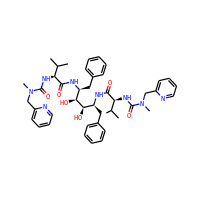

In [0]:
from rdkit import Chem
from rdkit.Chem import Draw

m = Chem.MolFromSmiles('CC(C)[C@H](NC(=O)N(C)Cc1ccccn1)C(=O)N[C@@H](Cc1ccccc1)[C@H](O)[C@H](O)[C@H](Cc1ccccc1)NC(=O)[C@@H](NC(=O)N(C)Cc1ccccn1)C(C)C')

Draw.MolsToImage([m])

# Example 1 HIV
(corona virus is further down)

this segment is based directly on this great video:  
https://www.youtube.com/watch?v=rBEKZQ22nhs

## Step 1 - let's download some HIV

In [0]:
!wget -nc https://files.rcsb.org/download/1HVC.pdb
!wget -nc https://zinc15.docking.org/substances/ZINC000085548251.smi # example inhibitor

--2020-02-20 10:53:14--  https://files.rcsb.org/download/1HVC.pdb
Resolving files.rcsb.org (files.rcsb.org)... 128.6.244.12
Connecting to files.rcsb.org (files.rcsb.org)|128.6.244.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1HVC.pdb’

1HVC.pdb                [ <=>                ] 316.49K  --.-KB/s    in 0.08s   

2020-02-20 10:53:14 (3.91 MB/s) - ‘1HVC.pdb’ saved [324081]

--2020-02-20 10:53:16--  https://zinc15.docking.org/substances/ZINC000085548251.smi
Resolving zinc15.docking.org (zinc15.docking.org)... 169.230.26.43
Connecting to zinc15.docking.org (zinc15.docking.org)|169.230.26.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [chemical/x-daylight-smiles]
Saving to: ‘ZINC000085548251.smi’

ZINC000085548251.sm     [ <=>                ]     142  --.-KB/s    in 0s      

2020-02-20 10:53:16 (5.32 MB/s) - ‘ZINC000085548251.smi’ saved [142]



## Step 2 - prepare the molecules
- hiv
- inhibitor

In [0]:
# Source: https://github.com/sarisabban/Notes/blob/master/AutoDock.py
'''
Prepares the receptor by first removing all the water molecules from
the protein's structure, then adds only the polar hydrogens, then
it exports the resulting structure and converts it to a .pdbqt file.
'''
'''
While this seems bit weird, it is as presented in the video tutorial...
It may take quite some time.
'''
!grep ATOM 1HVC.pdb > R.pdb
!pymol R.pdb -c -d "remove resn HOH;h_add acceptors or donors;save temp.pdb"
!babel temp.pdb temp.pdbqt -xh
!grep ATOM temp.pdbqt > receptor.pdbqt

 PyMOL(TM) Molecular Graphics System, Version 1.8.4.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Command mode. No graphics front end.
 Detected 2 CPU cores.  Enabled multithreaded rendering.
 CmdLoad: "R.pdb" loaded as "R".
PyMOL>remove resn HOH;h_add acceptors or donors;save temp.pdb
 Save: wrote "temp.pdb".
 PyMOL: normal program termination.
1 m

In [0]:
!obabel ZINC000085548251.smi -opdbqt -m --gen3d best -p -xh

*** Open Babel Warning  in CheckForUnintendedBatch
  This was a batch operation. For splitting, use non-empty base name for the output files
1 molecule converted


## Step 3 - run autodock vina

Things to note:
- Running this in **colab** is CRAZY, the cpu is slower than a snail. Your laptop is faster.
- The bounding box is chosen by a prior **manual** examination, see the video.
    - 0 0 10 15 15 15
    - box size affects performance
- exhaustiveness = 2
    - default is 8, this is set to 2 so that colab would actually finish it quicker, use atleast 10

In [0]:
!vina --receptor receptor.pdbqt --ligand ZINC000085548251.pdbqt --out out.pdbqt --log ligand.log --exhaustiveness 2 --center_x 0 --center_y 0 --center_z 10 --size_x 15 --size_y 15 --size_z 15

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -38

The output is now in:

- **out.pdbqt** best matching allignment
- **receptor.pdbqt** your receptor

when vieving the two files together in pymol, you can see visually how they were aligned.

Download the files and run locally.

```
pymol receptor.pdbqt out.pdbqt
```
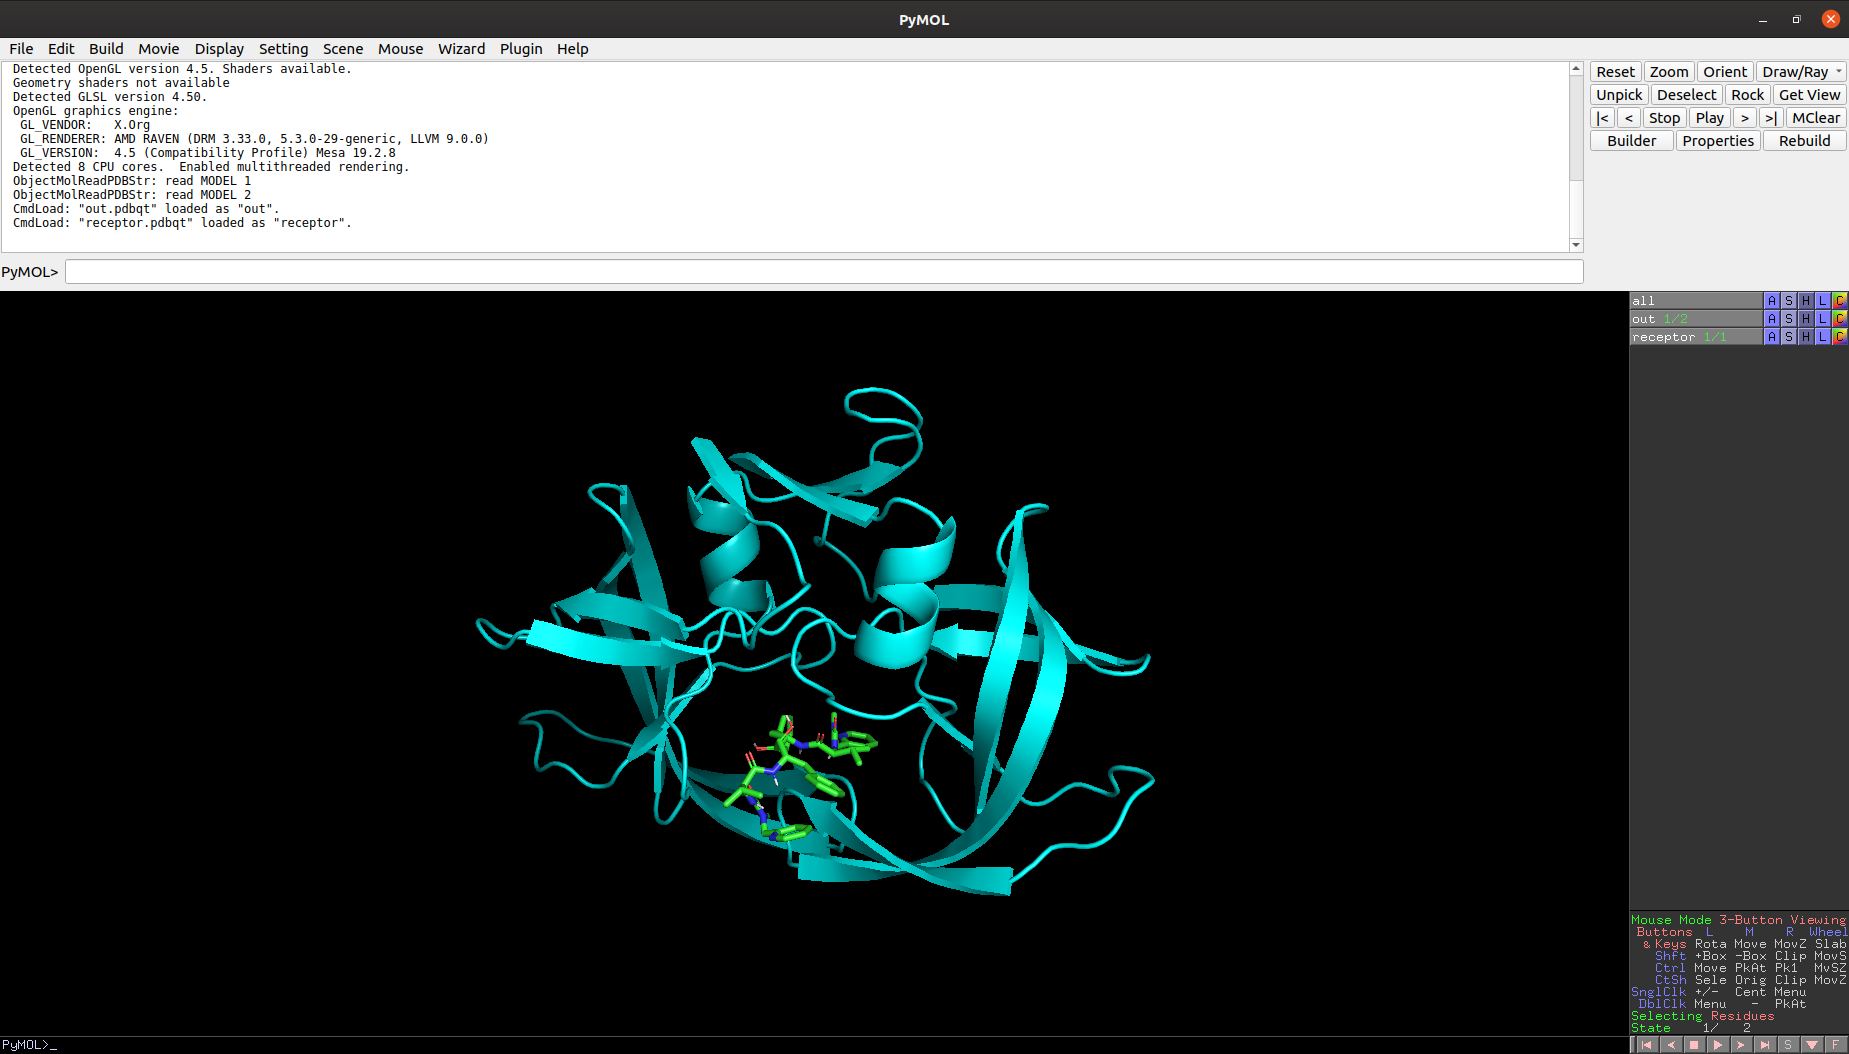




# Example 2 - Coronavirus

## Step 1: download the virus & inhibitor

File ‘6LU7.pdb’ already there; not retrieving.



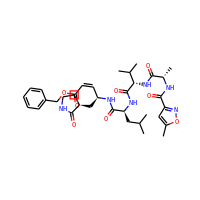

In [0]:
!wget -nc https://files.rcsb.org/download/6LU7.pdb

# http://www.rcsb.org/bird/PRD_002214; did not find it in ZINC
!echo "CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)c1cc(C)on1)C(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)\C=C/C(=O)OCc3ccccc3 PRD_002214" > cov_inhibitor.smi
m = Chem.MolFromSmiles('CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](C)NC(=O)c1cc(C)on1)C(C)C)C(=O)N[C@@H](C[C@@H]2CCNC2=O)\C=C/C(=O)OCc3ccccc3 PRD_002214')
Draw.MolsToImage([m])

# Step 2: prep

In [0]:
# Source: https://github.com/sarisabban/Notes/blob/master/AutoDock.py
'''
Prepares the receptor by first removing all the water molecules from
the protein's structure, then adds only the polar hydrogens, then
it exports the resulting structure and converts it to a .pdbqt file.
'''
'''
While this seems bit weird, it is as presented in the video tutorial...
It may take quite some time.
'''
!grep ATOM 6LU7.pdb > R.pdb
!pymol R.pdb -c -d "remove resn HOH;h_add acceptors or donors;save temp.pdb"
!babel temp.pdb temp.pdbqt -xh
!grep ATOM temp.pdbqt > cov_receptor.pdbqt

 PyMOL(TM) Molecular Graphics System, Version 1.8.4.0.
 Copyright (c) Schrodinger, LLC.
 All Rights Reserved.
 
    Created by Warren L. DeLano, Ph.D. 
 
    PyMOL is user-supported open-source software.  Although some versions
    are freely available, PyMOL is not in the public domain.
 
    If PyMOL is helpful in your work or study, then please volunteer 
    support for our ongoing efforts to create open and affordable scientific
    software by purchasing a PyMOL Maintenance and/or Support subscription.

    More information can be found at "http://www.pymol.org".
 
    Enter "help" for a list of commands.
    Enter "help <command-name>" for information on a specific command.

 Hit ESC anytime to toggle between text and graphics.

 Command mode. No graphics front end.
 Detected 2 CPU cores.  Enabled multithreaded rendering.
 CmdLoad: "R.pdb" loaded as "R".
PyMOL>remove resn HOH;h_add acceptors or donors;save temp.pdb
 Save: wrote "temp.pdb".
 PyMOL: normal program termination.
1 m

In [0]:
!obabel cov_inhibitor.smi -opdbqt -m --gen3d best -p -xh

*** Open Babel Warning  in CheckForUnintendedBatch
  This was a batch operation. For splitting, use non-empty base name for the output files
1 molecule converted


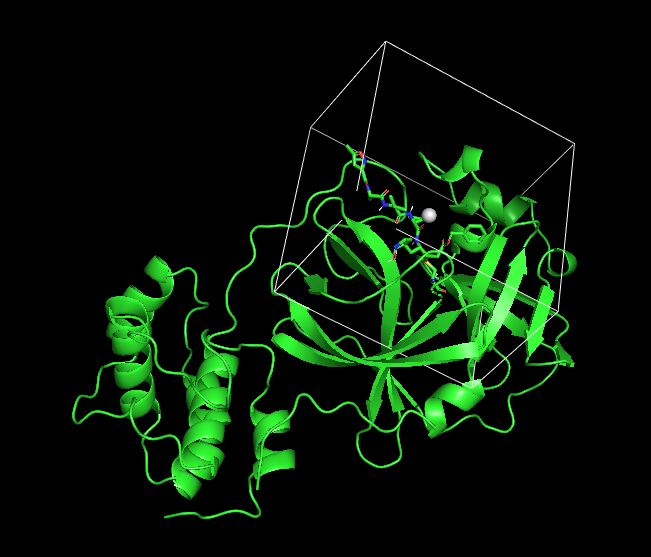

In [0]:
# Box(-10, 15, 70, 10, 15, 15)
# Box(-10, 15, 70, 10, 20, 20)
!vina --receptor cov_receptor.pdbqt --ligand cov_inhibitor.pdbqt --out cov_out.pdbqt --log ligand.log --exhaustiveness 2 --center_x -10 --center_y 15 --center_z 70 --size_x 10 --size_y 20 --size_z 20

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 2 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: 203

# Results from running this in a faster machine:

- Detected 8 CPUs
- None of the solutions look like the original inhibitor docking in the source file. :(
- Evaluating a single sample takes very long...  

```
--exhaustiveness 2 --center_x -10 --center_y 15 --center_z 70 --size_x 15 --size_y 20 --size_z 20
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1         -5.7      0.000      0.000
   2         -4.7      1.926      2.881
   3         -4.5      2.569      4.201
   4         -4.4      1.960      3.437
   5         -3.6      3.066      4.879
   6         -3.0      4.069     10.892

```

```
--exhaustiveness 10 --center_x -10 --center_y 15 --center_z 70 --size_x 15 --size_y 20 --size_z 20
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1         -5.9      0.000      0.000
   2         -5.5      2.019      2.209
   3         -5.5      2.341      6.215
   4         -5.5      3.659      7.623
   5         -5.4      4.545      9.507
   6         -5.4      2.297      2.887
   7         -5.3      3.642      7.434
   8         -5.3      5.463     10.136
   9         -5.1      3.031      6.706
```

```
--exhaustiveness 32 --center_x -10 --center_y 15 --center_z 70 --size_x 15 --size_y 20 --size_z 20
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1         -7.5      0.000      0.000
   2         -7.5      2.618      4.429
   3         -7.4      2.605      6.623
   4         -7.4      2.276      6.187
   5         -7.3      3.214      8.524
   6         -7.3      2.031      3.693
   7         -7.2      2.631      5.214
   8         -7.1      3.256      8.230
   9         -7.1      2.671      7.397
```

```
--exhaustiveness 128 --center_x -10 --center_y 15 --center_z 70 --size_x 15 --size_y 20 --size_z 20
mode |   affinity | dist from best mode
     | (kcal/mol) | rmsd l.b.| rmsd u.b.
-----+------------+----------+----------
   1         -6.8      0.000      0.000
   2         -6.7      1.862      6.864
   3         -6.1      3.213      7.795
   4         -6.1      2.445      7.961
   5         -6.1      1.944      3.951
   6         -6.0      3.801      8.112
   7         -6.0      2.024      4.483
   8         -6.0      3.396      8.532
   9         -5.9      2.457      8.852
```







### Left: best of the exhaustiveness 128 trial
### Right: the source file with the example inhibitor still attached

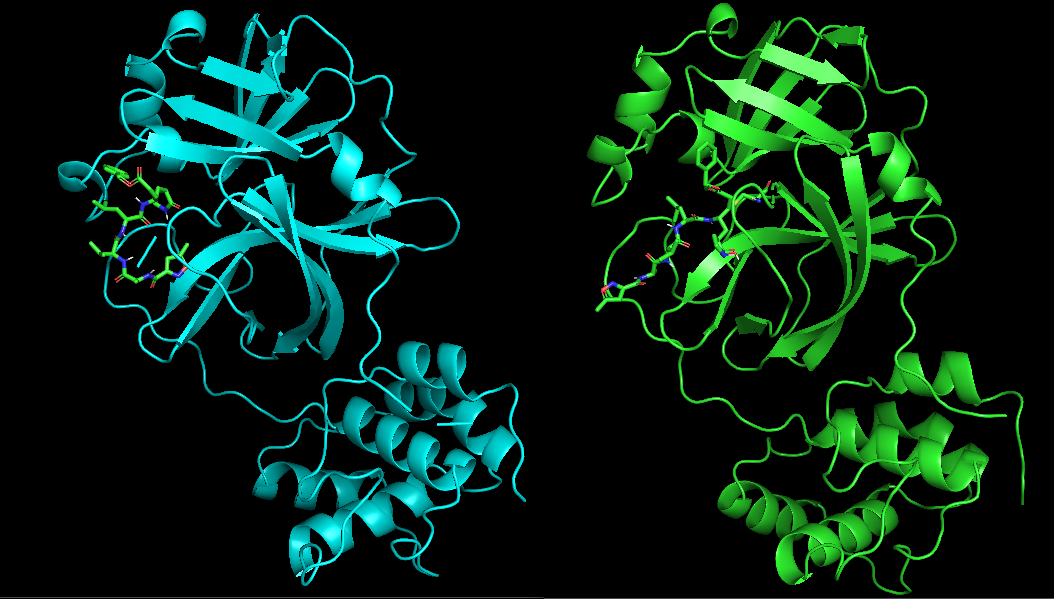